In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
import logging

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
    
aequ_dir = "/mnt/c/Users/jan.zill/code/aequilibrae"
if aequ_dir not in sys.path:
    sys.path.append(aequ_dir)

from aequilibrae import logger  # noqa: E402
stdout_handler = logging.StreamHandler(sys.stdout)
logger.addHandler(stdout_handler)

import utils

In [4]:
code_dir = "/mnt/c/Users/jan.zill/code"
tntp_dir = os.path.join(code_dir, "TransportationNetworks_aequilibrae")
scenario = "Anaheim" #"Berlin-Center" #
folder = os.path.join(tntp_dir, scenario)

if scenario == "Berlin-Center":
    link_file =  "berlin-center_net_clean.tntp" # DUPLICATE NODES REMOVED  "berlin-center_net_clean_bpr_altered.tntp" #
    trip_file =  "berlin-center_trips.tntp"
else:
    link_file =  f"{scenario}_net.tntp"
    trip_file =  f"{scenario}_trips.tntp"
    
# best_known_solution = list(filter(lambda x: "_flow.tntp" in x, os.listdir(folder)))
# if len(best_known_solution) == 1:
#     sol_file = best_known_solution[0]
# else:
#     sol_file = None
if scenario == "Anaheim":
    best_sol = pd.read_csv(os.path.join(folder, f"{scenario}_flow.tntp"), sep='\t', skiprows=5).rename(columns={"Tail ": "a_node", "Head ": "b_node", "Volume ": "flow_best"}).drop(columns=['~ ', ': ', '; ', 'Cost '])

In [6]:
block_centroids = True
r_gap = 1*1e-5

In [7]:
%%time
path_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bush-based", block_centroids=block_centroids, rgap=r_gap)

bush-based Assignment STATS
 Initialised data structures, num nodes = 416, num links = 914
 0th iteration done, cost = 1296185.75
Iteration 1, computed gap: 0.0020655976391339426, computed objective: 1287869.375
Iteration 2, computed gap: 0.00010550308297574418, computed objective: 1286209.75
Iteration 3, computed gap: 1.4592302448046546e-05, computed objective: 1286160.125
bush-based Assignment finished. 3 iterations and 1.4592302448046546e-05 final gap
CPU times: user 32.8 s, sys: 4.94 s, total: 37.8 s
Wall time: 5.21 s


In [8]:
%%time
bfw_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bfw", block_centroids=block_centroids, rgap=r_gap)

bfw Assignment STATS
Iteration, RelativeGap, stepsize
1,inf,1.0
2,0.01813536336911382,0.2561015932062777
# Alert: Adding 0.3333333333333333 to stepsize to make it non-zero
3,0.0036265961074987314,0.3333333333333333
# Alert: Adding 0.25 to stepsize to make it non-zero
4,0.0023005021214473923,0.25
# Alert: Adding 0.2 to stepsize to make it non-zero
5,0.0016660925434687926,0.2
# Alert: Adding 0.16666666666666666 to stepsize to make it non-zero
6,0.0013674148395810882,0.16666666666666666
# Alert: Adding 0.14285714285714285 to stepsize to make it non-zero
7,0.0011521665035999808,0.14285714285714285
# Alert: Adding 0.125 to stepsize to make it non-zero
8,0.0009970861455201863,0.125
# Alert: Adding 0.1111111111111111 to stepsize to make it non-zero
9,0.0008651833121821925,0.1111111111111111
# Alert: Adding 0.1 to stepsize to make it non-zero
10,0.0007703386571853957,0.1
# Alert: Adding 0.09090909090909091 to stepsize to make it non-zero
11,0.0007020823903878244,0.09090909090909091
# Alert: Ad

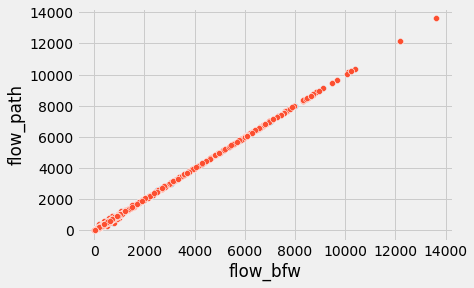

max diff in flow = 250.174
max rel diff in flow = 9241.480%


,link_id_bfw,a_node,b_node,capacity_bfw,alpha_bfw,beta_bfw,direction_bfw,flow_bfw,link_id_path,capacity_path,alpha_path,beta_path,direction_path,flow_path,flow_best,abs_change,rel_change
607,607,327,328,5400,0.15,4,1,750.660952,607,5400,0.15,4,1,500.487152,786.585885,250.173800,0.333271
663,663,341,342,5400,0.15,4,1,614.924917,663,5400,0.15,4,1,811.013000,599.214115,196.088084,0.318881
605,605,327,315,5400,0.15,4,1,736.201772,605,5400,0.15,4,1,930.213257,727.806161,194.011484,0.263530
564,564,315,299,5400,0.15,4,1,736.201772,564,5400,0.15,4,1,930.213257,727.806161,194.011484,0.263530
509,509,299,300,5400,0.15,4,1,208.359120,509,5400,0.15,4,1,393.525116,185.200000,185.165996,0.888687
568,568,316,300,5400,0.15,4,1,497.622885,568,5400,0.15,4,1,312.499969,516.344813,185.122916,0.372014
609,609,328,316,5400,0.15,4,1,969.220878,609,5400,0.15,4,1,784.100037,987.944813,185.120842,0.191000
698,698,353,341,5400,0.15,4,1,1086.649536,698,5400,0.15,4,1,1266.013306,1063.606161,179.363770,0.165061
667,667,342,343,5400,0.15,4,1,434.688057,667,5400,0.15,4,1,593.534729,411.489895,158.846672,0.365427
700,700,353,354,5400,0.15,4,1,609.619813,700,5400,0.15,4,1,455.193481,587.324113,154.426331,0.253316


In [12]:
full_result = bfw_res_.drop(columns=['time']).merge(path_res_.drop(columns=['time']), on=['a_node', 'b_node'], how='outer', suffixes=['_bfw', '_path']).merge(best_sol, on=['a_node', 'b_node'], how='outer')
sns.scatterplot(data=full_result, x='flow_bfw', y='flow_path');
sns.scatterplot(data=full_result, x='flow_best', y='flow_path');
plt.show();
full_result['abs_change'] = np.abs(full_result.flow_bfw - full_result.flow_path)
full_result['rel_change'] = full_result['abs_change'] / full_result['flow_bfw']
print(f"max diff in flow = {full_result['abs_change'].max():.3f}")
print(f"max rel diff in flow = {full_result['rel_change'].abs().max():.3f}%")
display(full_result.sort_values(by=['abs_change'], ascending=False).head(10))